In [2]:
#!pip install pycountry
import pycountry
import pandas as pd

pycountry.countries.lookup('Islamic Republic of Iran').alpha_3
pycountry.countries.lookup('Hong Kong')
pycountry.countries.lookup('Taiwan')
pycountry.countries.lookup("Côte d'Ivoire")
pycountry.countries.lookup("Dominican Republic")
pycountry.countries.lookup("United Kingdom")
pycountry.countries.lookup("Moldova")
pycountry.countries.lookup("Syrian Arab Republic")
pycountry.countries.lookup("Russian Federation")
pycountry.countries.lookup("Korea, Republic of")
#Kosovo 

df = pd.read_csv("tokyo2020byCountries.csv")
df["country_pretty"]=df["country"].str.replace("-"," ")

# changing pretty name of some countries for easy lookup
df.loc[df["country"] == 'chinese-taipei','country_pretty'] = 'Taiwan'
df.loc[df["country"] == 'cote-d-ivoire','country_pretty'] = "Côte d'Ivoire"
df.loc[df["country"] == 'dominican-rep-','country_pretty'] = 'Dominican Republic'
df.loc[df["country"] == 'great-britain','country_pretty'] = 'United Kingdom'
df.loc[df["country"] == 'hong-kong-china','country_pretty'] = 'Hong Kong'
df.loc[df["country"] == 'islamic-rep-of-iran','country_pretty'] = 'Islamic Republic of Iran'
df.loc[df["country"] == 'rep-of-moldova','country_pretty'] = 'Moldova'
df.loc[df["country"] == 'republic-of-korea','country_pretty'] = 'Korea, Republic of'
df.loc[df["country"] == 'roc','country_pretty'] = 'Russian Federation'
df.loc[df["country"] == 'syrian-arab-rep-','country_pretty'] = 'Syrian Arab Republic'

#lookup and add a column for ISO3166-1 alpha-3 country code
ccc = []
for i in range(93):
    try:
        alpha_3 = pycountry.countries.lookup(df["country_pretty"][i]).alpha_3
    except LookupError as e:
        alpha_3 = "ERR"
    ccc.append(alpha_3)
df["country_3166-1_alpha-3"] = ccc

df[df["country_3166-1_alpha-3"] == "ERR"] # only KOSOVO will reamin at this point

,Unnamed: 0,country,Gold,Silver,Bronze,Total,TotalWeighted,rank_Total_min,rank_Total_weighted,country_pretty,country_3166-1_alpha-3
50,50,kosovo,2,0,0,2,6,66.0,60.0,kosovo,ERR


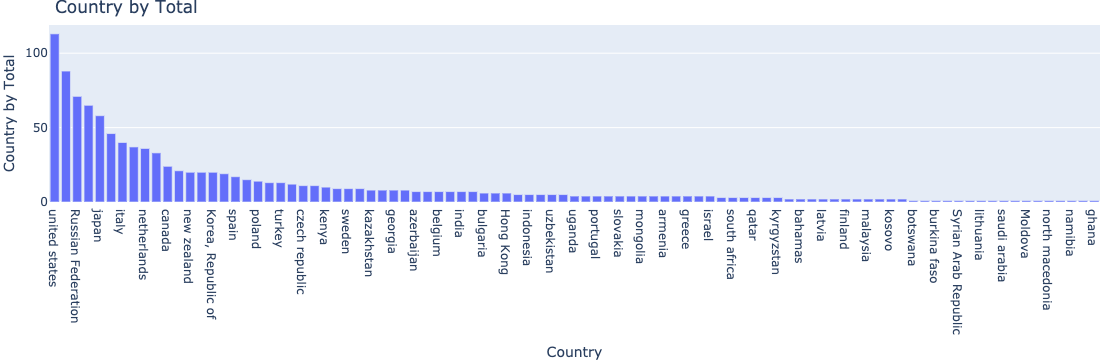

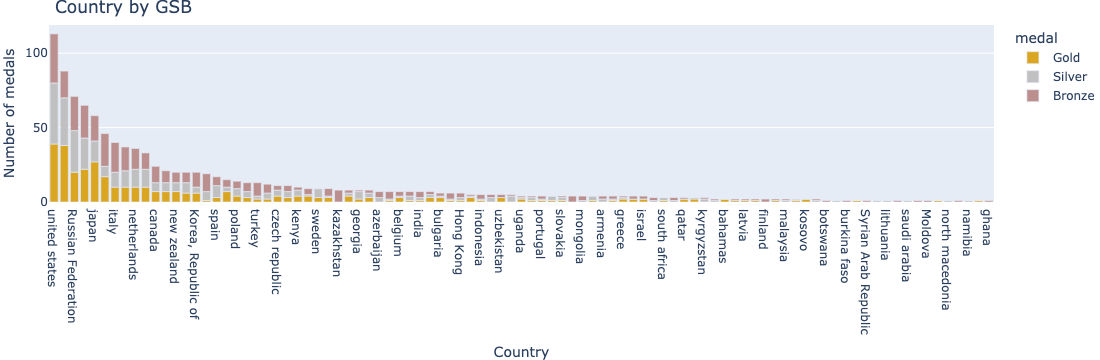

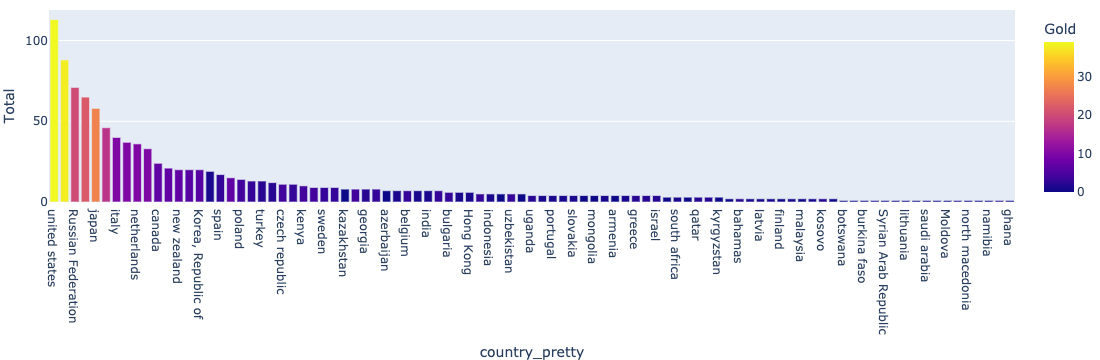

In [44]:
import plotly.express as px

fig = px.bar(df.sort_values(['Total'], ascending=False), 
             x='country_pretty', y="Total",
             labels={'Total':'Country by Total', 'country_pretty':'Country'},
             title='Country by Total',
             hover_data=['country_pretty', 'Total'])
fig.update_layout(margin=dict(l=0, r=0, t=25, b=10))
fig.show()
fig = px.bar(df.sort_values(['Total'], ascending=False), 
             x='country_pretty', y=["Gold", "Silver", "Bronze"],
#             color_discrete_sequence=["goldenrod", "white", "red"],
             color_discrete_map={"Gold": "goldenrod","Silver": "silver","Bronze": "rosybrown"},
             title='Country by GSB',
             labels={"value": "Number of medals", "variable": "medal", 'country_pretty':'Country'})
fig.update_layout(margin=dict(l=0, r=0, t=25, b=10))
fig.show()
fig = px.bar(df.sort_values(['Total'], ascending=False), 
             x='country_pretty', y="Total", color="Gold")
fig.update_layout(margin=dict(l=0, r=0, t=10, b=10))
fig.show()

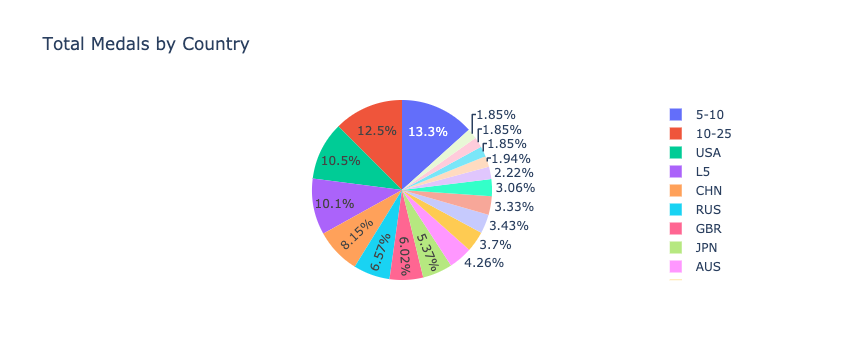

In [9]:
df1 = df
df1.loc[df['Total'] < 20, 'country_3166-1_alpha-3'] = '10-25' # Represent only large countries
df1.loc[df['Total'] < 10, 'country_3166-1_alpha-3'] = '5-10'
df1.loc[df['Total'] < 5, 'country_3166-1_alpha-3'] = 'L5'

fig = px.pie(df1, values='Total', names='country_3166-1_alpha-3', title='Total Medals by Country')
fig.show()

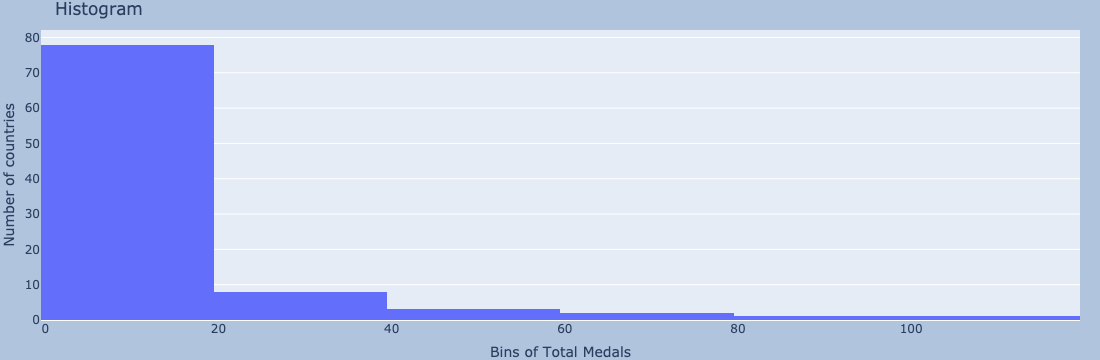

In [33]:
fig = px.histogram(df, x='Total', title='Histogram',
                   nbins=10,
                   labels={"Total":"Bins of Total Medals"})
fig.update_layout(yaxis_title="Number of countries")
fig.update_layout(
    margin=dict(l=0, r=20, t=30, b=20),
    paper_bgcolor="LightSteelBlue"
)
fig.show()